# Introduction

This project sets to analyze a dataset of employee messages to find the sentiment and engagement. The LLM Assessment is divided up into 6 tasks: Sentiment Labeling, Exploratory Data Analysis (EDA), Employee Score Calculation, Employee Ranking, Flight Risk Identification, and Predictive Modeling.

Sentiment Labeling uses an LLM model to automatically label each message as Positive, Negative, or Neutral.

Exploratory Data Analysis (EDA) analyzes and visualizes the data to understand its structure and underlying trends.

Employee Score Calculation computes a monthly sentiment score for each employee based on their messages.

Flight Risk Identification makes a list of any employee who has sent 4 or morenegative mails in a given month.

Predictive Modeling uses a linear regression model to further analyzesentiment trends

## Task 1: Sentiment Labeling

### Approach

The BERT model was used due to its higher capacity to process data compared to other Large Language Models (LLM) and since the model categorized strings using the same parameters as the prompt (Pos, Nega, Neu). In my code, I ran the csv file through the model and stored it in a dataframe. I converted the sentiment output to the standard Positive, Negative, and Neutral strings from the project parameters.

In [39]:
!pip install pandas transformers
from transformers import pipeline
import pandas as pd

# Installs and imports necessary modules

In [40]:
# Import model
sentiment_pipeline = pipeline("sentiment-analysis", model="MarieAngeA13/Sentiment-Analysis-BERT")

Device set to use cpu


In [36]:
# Load data
df = pd.read_csv('./test_rev.csv', usecols=["Subject","body","date","from"], parse_dates=["date"])

In [37]:
# Convert useable data to list
data = df['body'].tolist()
## Check 
print(data[1])

# Store output in variable
sentiment = sentiment_pipeline(data)
## Check
print(sentiment[1]["label"])

Marc,

Unfortunately, today is not going to work for the revenue model for mid & 
back office services meeting.  How about this coming Monday, Feb 26 from 1:00 
- 2:30 pm?  I have penciled in that time for Sally, Mary Solmonson & James 
Scribner.  Please let me know if that will work for you.

Thanks,
Patti x39106
neutral


In [38]:
# Change labels to more readable format
final_sentiment = []

for i in range(len(sentiment)):
    if sentiment[i]["label"] == "positive":
        final_sentiment.append("Positive")
    if sentiment[i]["label"] == "neutral":
        final_sentiment.append("Neutral")
    elif sentiment[i]["label"] == "negative":
        final_sentiment.append("Negative")

## Check 
print(final_sentiment[1])

Neutral


In [63]:
# Store sentiment in dataframe
df['Sentiment'] = final_sentiment

df.to_csv('datawithSentiment.csv', index=False)

## Check
print(df.head(3)) 
print(df.columns)

                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated... 2010-05-10   
1  Marc,\n\nUnfortunately, today is not going to ... 2010-07-29   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ... 2011-07-25   

                   from Sentiment  
0  sally.beck@enron.com  Positive  
1   eric.bass@enron.com   Neutral  
2  sally.beck@enron.com   Neutral  
Index(['Subject', 'body', 'date', 'from', 'Sentiment'], dtype='object')


## Task 2: Exploratory Data Analysis (EDA)

In [47]:
!pip install pandas numpy seaborn matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Install and import necessary modules

In [91]:
# Import sentiment dataframe
df = pd.read_csv('./datawithSentiment.csv')

##Check imported df 
print(df.head(5))

                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body        date  \
0  EnronOptions Announcement\n\n\nWe have updated...  2010-05-10   
1  Marc,\n\nUnfortunately, today is not going to ...  2010-07-29   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  2011-07-25   
3  we were thinking papasitos (we can meet somewh...  2010-03-25   
4  Since you never gave me the $20 for the last t...  2011-05-21   

                      from Sentiment  
0     sally.beck@enron.com  Positive  
1      eric.bass@enron.com   Neutral  
2     sally.beck@enron.com   Neutral  
3  johnny.palmer@enron.com   Neutral  
4  lydia.delgado@enron.com   Neutral  


In [51]:
df.describe()
# Output: RangeIndex: 2191 entries, 0 to 2190. Used to describe dataframe but no numeric entries

,date
count,2191
mean,2010-12-31 02:17:21.716111360
min,2010-01-01 00:00:00
25%,2010-06-30 12:00:00
50%,2011-01-01 00:00:00
75%,2011-06-30 12:00:00
max,2011-12-31 00:00:00


In [69]:
# Change Sentiment to category for plots
df['Sentiment'] = df['Sentiment'].astype('category')

In [71]:
# Find data types of each column
print(df.info())
# Output: Shows Data Type of columns. Subject, body, and date are object types, while date is datetime64[ns]. Sentiment is a category type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Subject    2191 non-null   object  
 1   body       2191 non-null   object  
 2   date       2191 non-null   object  
 3   from       2191 non-null   object  
 4   Sentiment  2191 non-null   category
dtypes: category(1), object(4)
memory usage: 70.9+ KB
None


In [75]:
# Check for duplicates
print(df.loc[df.duplicated()])
# No duplicates found

Empty DataFrame
Columns: [Subject, body, date, from, Sentiment]
Index: []


In [77]:
# Check for null values
print(df.isna().sum())
# No null values found

Subject      0
body         0
date         0
from         0
Sentiment    0
dtype: int64


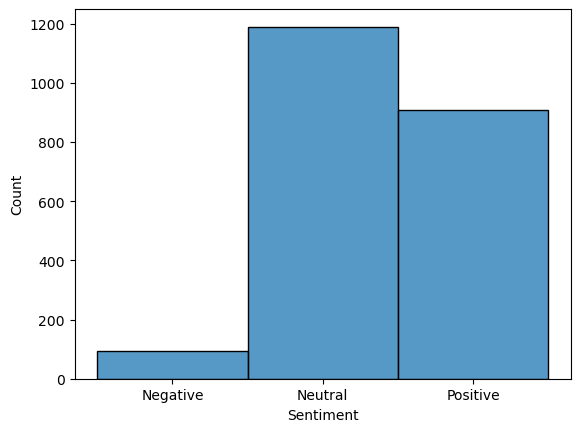

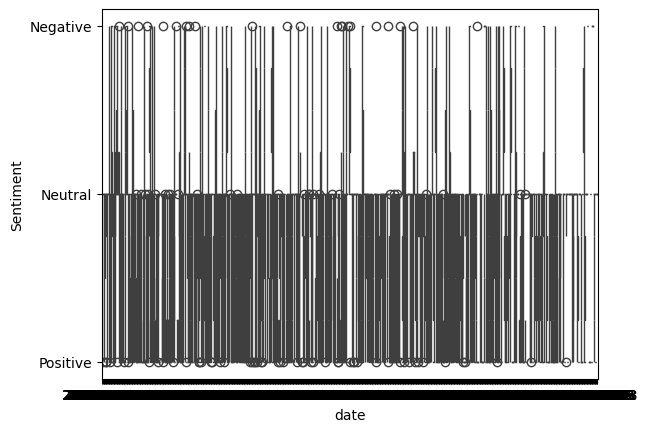

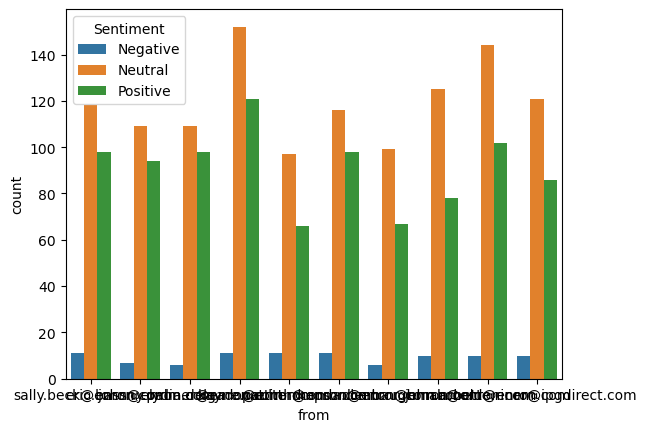

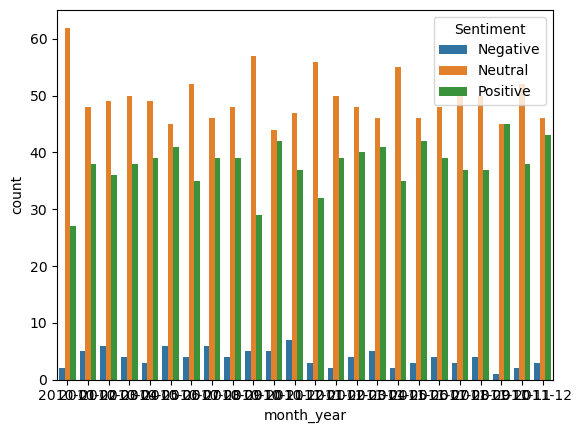

In [81]:
#Plots
# Histogram for Sentiment and overall count
sns.histplot(df['Sentiment'])
plt.show()

# Boxplot for distribution of Sentiment acrosss dates
sns.boxplot(x='date', y='Sentiment', data=df)
plt.show() 

# Countplot for the porportion of sentiment in emails sent by each employee
sns.countplot(x='from', data=df, hue='Sentiment')
plt.show()

# Extract month and year from date for Month-Year feature. Make sure date is in datetimefirst
df['date'] = pd.to_datetime(df['date'])
df['month_year'] = df['date'].dt.to_period('M').astype(str)
sorted_dates = sorted(df['month_year'].unique(), key=lambda x: pd.Period(x, freq='M'))
df['month_year'] = pd.Categorical(df['month_year'], categories=[str(d) for d in sorted_dates], ordered=True)

# Countplot for the distribution of sentiment over time by month
sns.countplot(x='month_year', data=df, hue='Sentiment')
plt.show()

### Observations
From the produced plots and graphs, I found that there was mostly neutral sentiment, followed by positive, and then at the least negative.
Negative sentiment was averaged to take place earliest in the timeline. Positive sentiment averaged to take place latest in the timeline.
Most were emails sent in January 2010.
December 2010 had the most negative sentiment
October 2011 had the same amount of negative as positive sentiment

## Task 3 & 4: Employee Score Calculation and Employee Ranking

In [3]:
!pip install pandas numpy seaborn matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Install and import necessary modules

In [4]:
# Import sentiment dataframe
df = pd.read_csv('./datawithSentiment.csv')

##Check imported df 
print(df.head(5))

                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body        date  \
0  EnronOptions Announcement\n\n\nWe have updated...  2010-05-10   
1  Marc,\n\nUnfortunately, today is not going to ...  2010-07-29   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  2011-07-25   
3  we were thinking papasitos (we can meet somewh...  2010-03-25   
4  Since you never gave me the $20 for the last t...  2011-05-21   

                      from Sentiment  
0     sally.beck@enron.com  Positive  
1      eric.bass@enron.com   Neutral  
2     sally.beck@enron.com   Neutral  
3  johnny.palmer@enron.com   Neutral  
4  lydia.delgado@enron.com   Neutral  


In [7]:
# Convert date column to datetime and separate into months
df['date'] = pd.to_datetime(df['date'])  
df['month_year'] = df['date'].dt.to_period('M')
uniquemonths = df['month_year'].unique()

In [9]:
# Dictionary to store scores by month
monthly_scores = {}

In [11]:
# Iterate through each month and calculate scores. Store scores in employee scores within monthly_scores

for month in uniquemonths:
    monthly_df = df[df['month_year'] == month]
    employee_score = dict.fromkeys(monthly_df['from'].unique(), 0)
    
    for i in range(len(monthly_df)):

        # Use index with iloc to get the value of the column
        sentiment = monthly_df.iloc[i]['Sentiment']
        sender = monthly_df.iloc[i]['from']
        
        # Neutral is ignored and treated as 0 while other sentiments get a numerical value added or subtracted as a value to the dictionary monthly_scores
        if sentiment == 'Positive':
            employee_score[sender] = employee_score.get(sender, 0) + 1
        elif sentiment == 'Negative':
            employee_score[sender] = employee_score.get(sender, 0) - 1
        
    # Store in monthly_scores dictionary created earlier
    monthly_scores[str(month)] = employee_score

In [13]:
# Create lists to store top positive and negative employees
top_positive_employees = []
top_negative_employees = []

for month in monthly_scores:
    # Sort the employee scores in descending order to get top scores
    sorted_scores = sorted(monthly_scores[month].items(), key=lambda x: x[1], reverse=True)
    
    # Get top 5 positive and negative employees in alphabetical order
    top_positives = sorted(sorted_scores[:5])
    top_negatives = sorted(sorted_scores[-5:])

 
     # Append to lists for each month in format to put into table
    for name, score in top_positives:
        top_positive_employees.append({'Month': month, 'Employee': name, 'Score': score})
    for name, score in top_negatives:
        top_negative_employees.append({'Month': month, 'Employee': name, 'Score': score})

In [15]:
# Create DataFrames to make tables for data and sort by month
top_positive_df = pd.DataFrame(top_positive_employees)
top_positive_df['Month'] = pd.to_datetime(top_positive_df['Month'])
top_positive_df = top_positive_df.sort_values(by='Month')

top_negative_df = pd.DataFrame(top_negative_employees)
top_positive_df['Month'] = pd.to_datetime(top_negative_df['Month'])
top_positive_df = top_negative_df.sort_values(by='Month')

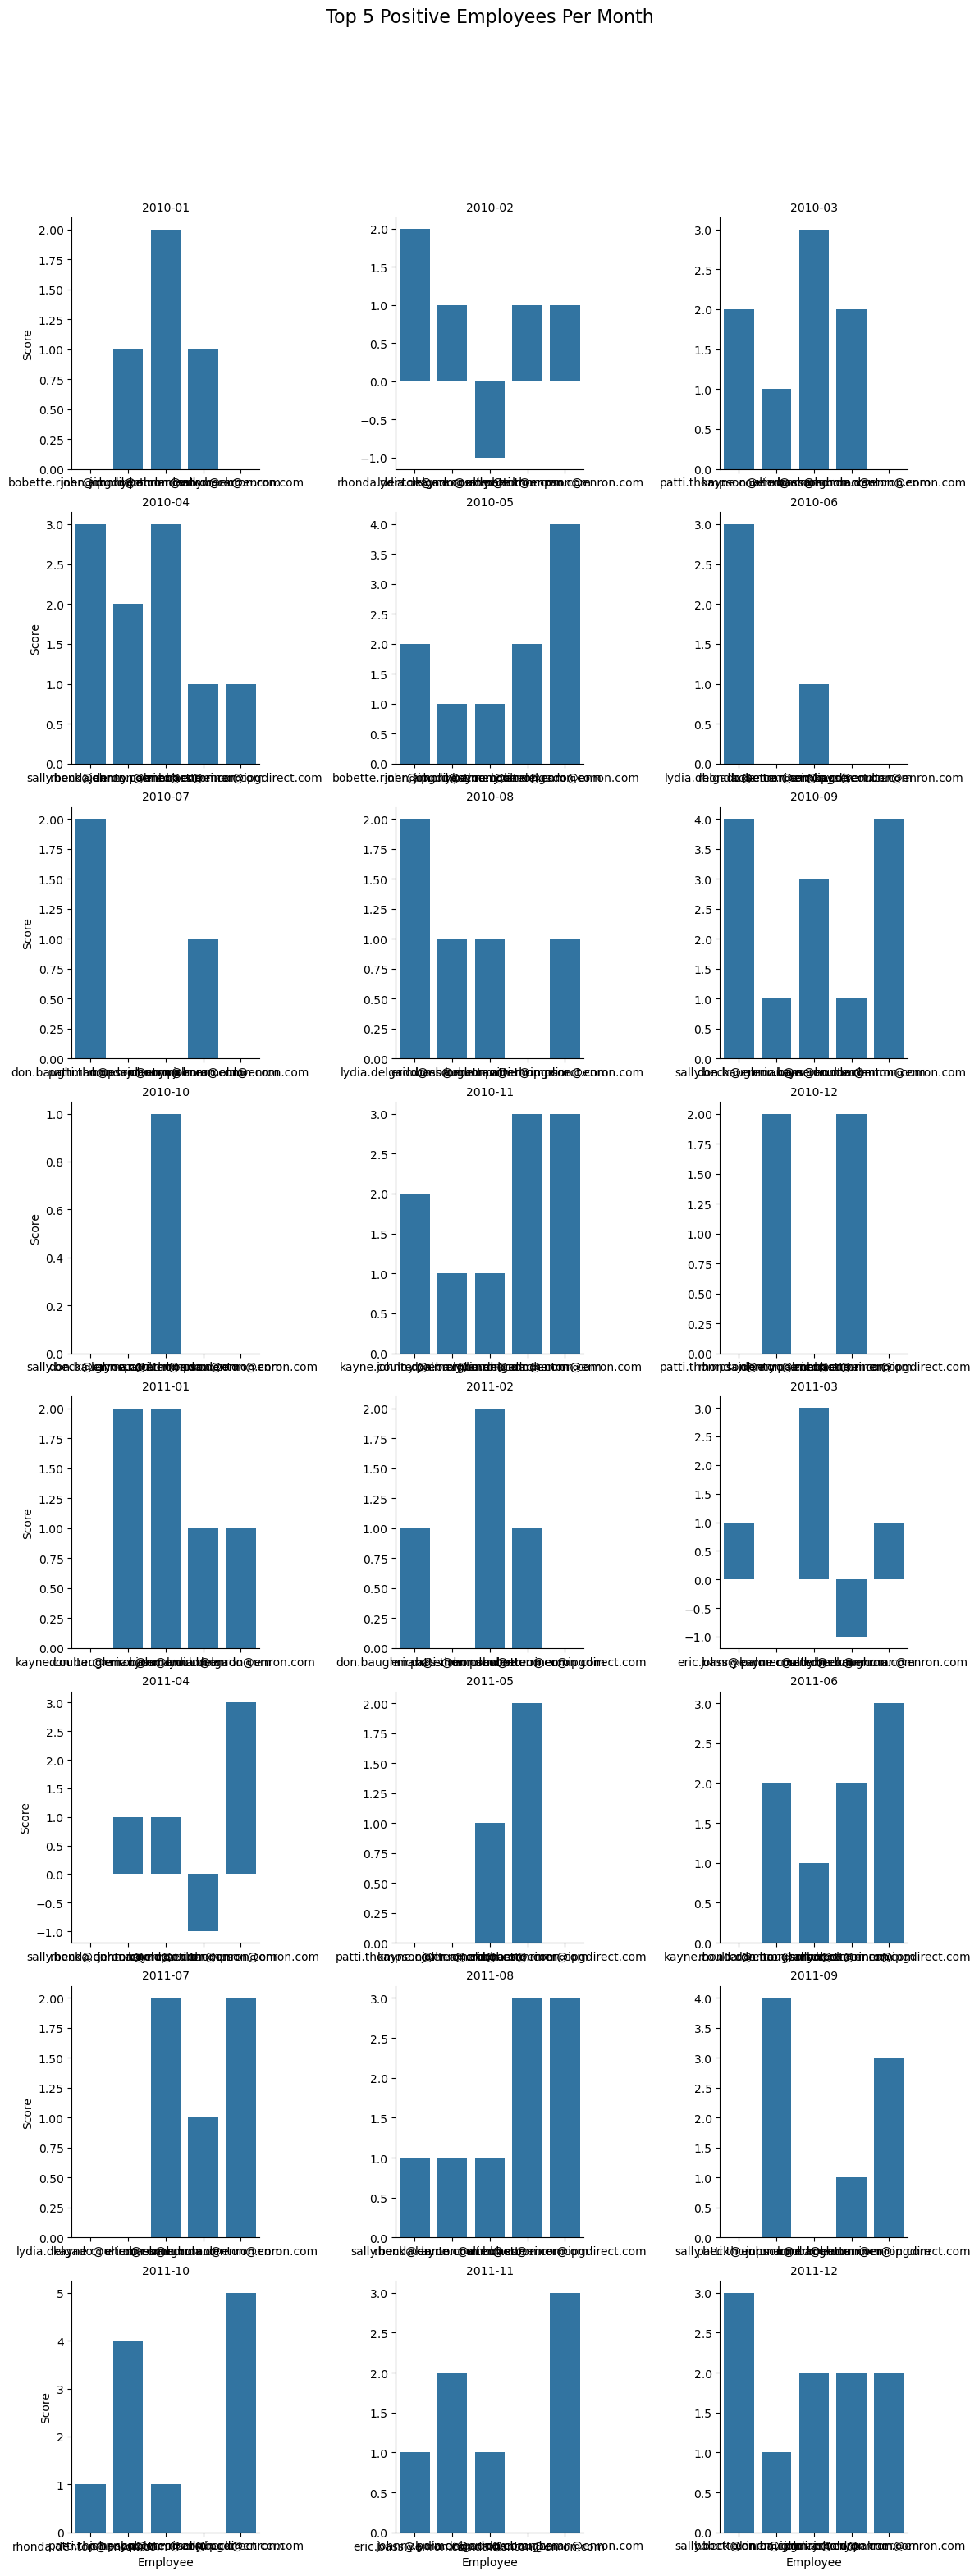

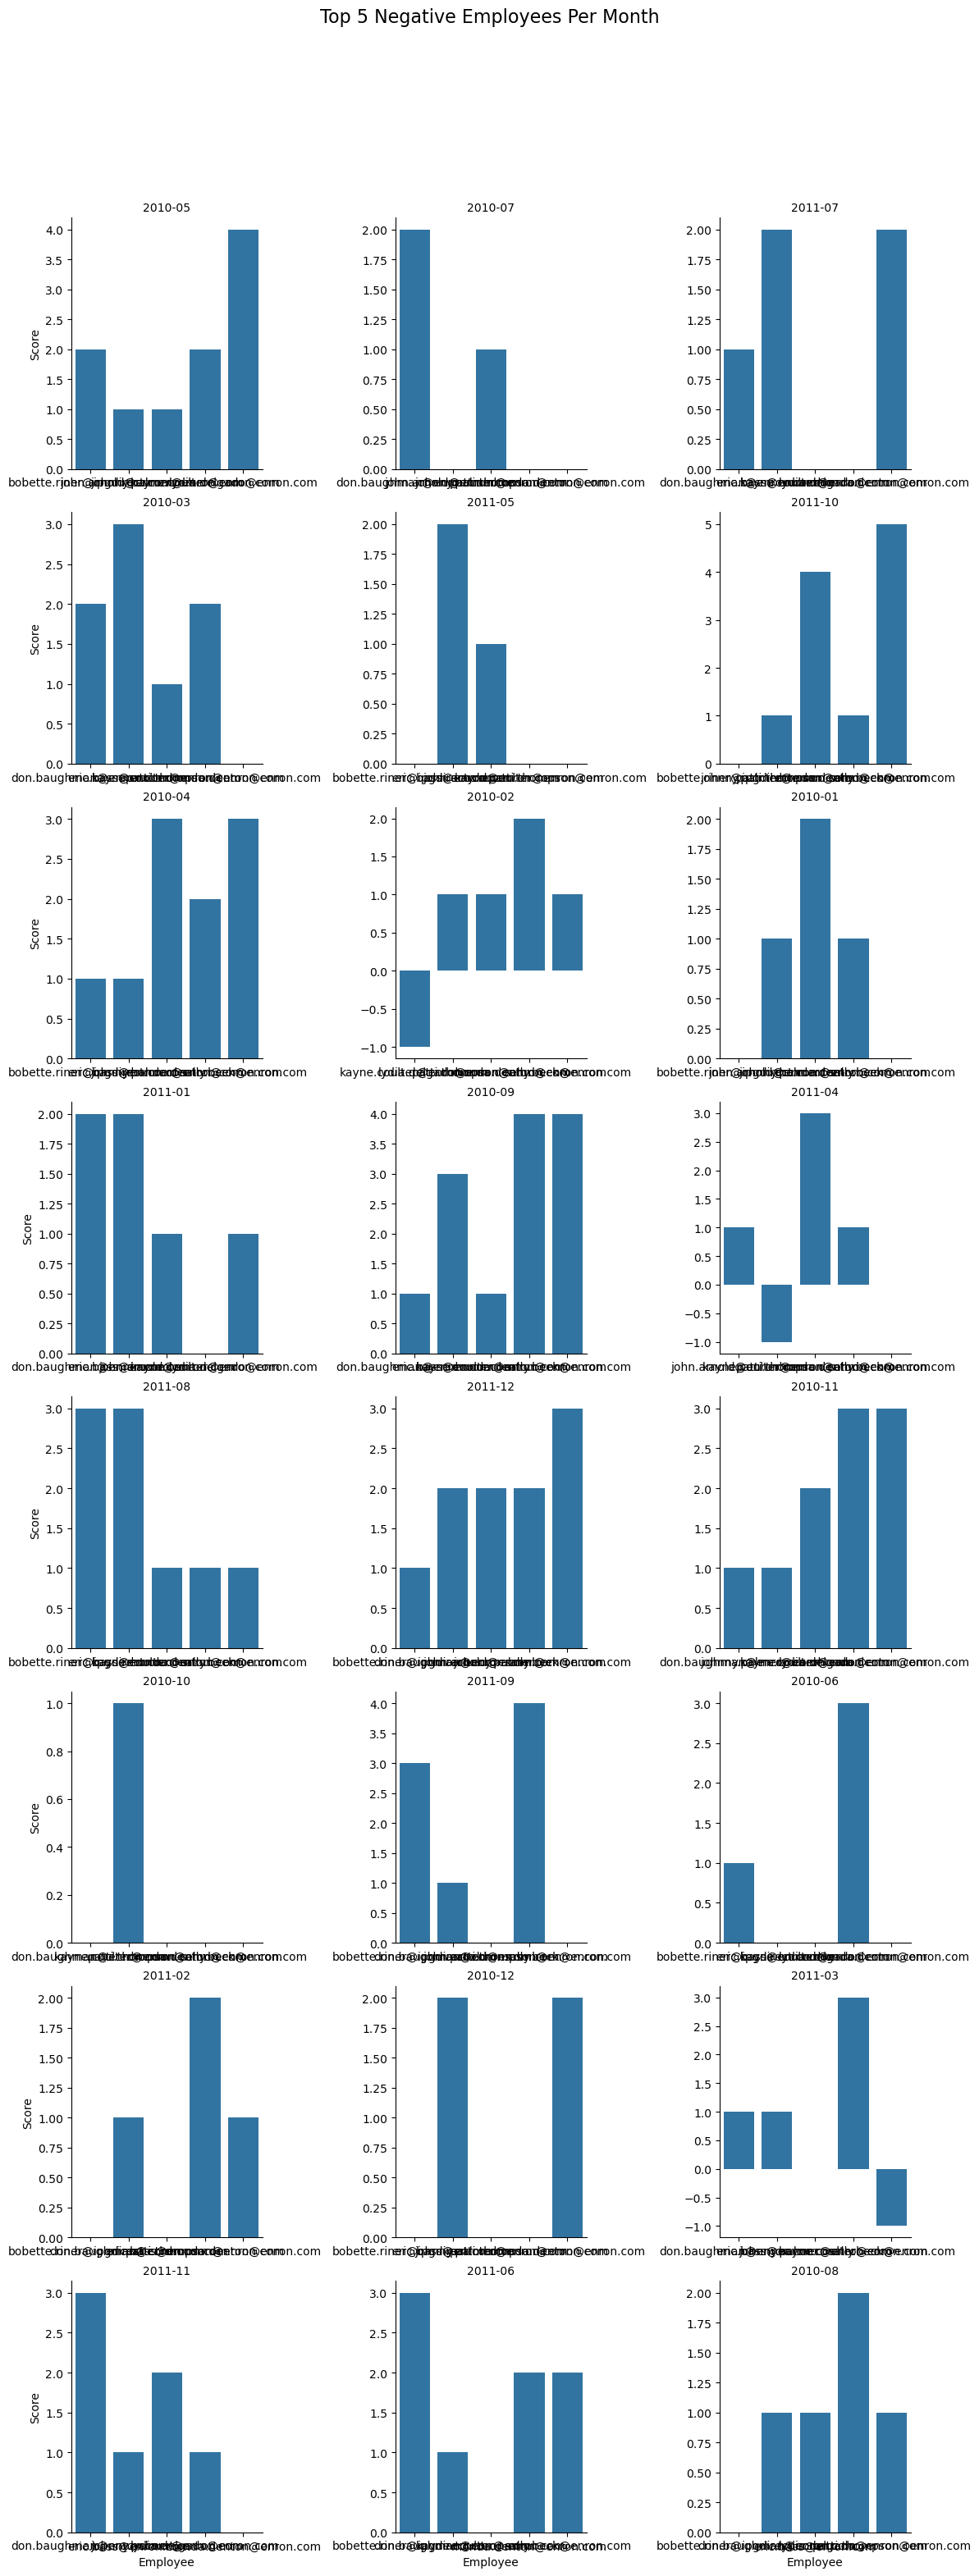

In [17]:
# Export Visualization
facetgrid_pos = sns.FacetGrid(top_positive_df, col="Month", col_wrap=3, height=4, sharex=False, sharey=False)
facetgrid_pos.map_dataframe(sns.barplot,x="Employee",y="Score", dodge=False)
facetgrid_pos.set_titles(col_template="{col_name}")
facetgrid_pos.set_axis_labels("Employee", "Score")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Top 5 Positive Employees Per Month", fontsize=16)
plt.show() 

facetgrid_neg = sns.FacetGrid(top_negative_df, col="Month", col_wrap=3, height=4, sharex=False, sharey=False)
facetgrid_neg.map_dataframe(sns.barplot,x="Employee",y="Score", dodge=False)
facetgrid_neg.set_titles(col_template="{col_name}")
facetgrid_neg.set_axis_labels("Employee", "Score")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Top 5 Negative Employees Per Month", fontsize=16)
plt.show() 


## Task 5: Flight Risk Identification

In [19]:
!pip install pandas numpy seaborn matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Install and import necessary modules

In [20]:
# Import sentiment dataframe
df = pd.read_csv('./datawithSentiment.csv')

##Check imported df 
print(df.head(5))

                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body        date  \
0  EnronOptions Announcement\n\n\nWe have updated...  2010-05-10   
1  Marc,\n\nUnfortunately, today is not going to ...  2010-07-29   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  2011-07-25   
3  we were thinking papasitos (we can meet somewh...  2010-03-25   
4  Since you never gave me the $20 for the last t...  2011-05-21   

                      from Sentiment  
0     sally.beck@enron.com  Positive  
1      eric.bass@enron.com   Neutral  
2     sally.beck@enron.com   Neutral  
3  johnny.palmer@enron.com   Neutral  
4  lydia.delgado@enron.com   Neutral  


In [21]:
# Ensure date column is in datetime and set as index for rolling function
df['date'] = pd.to_datetime(df['date'])  
df.set_index('date', inplace=True)



In [22]:
# Ensures dates are in order for .rolling function
df.sort_index(inplace=True)



In [23]:
# Store rolling 30 day count of each sentiment in rolling_days variable
rolling_days = df['Sentiment'].rolling('30D').count()

# Create list to store flight risk employees
flightrisk = []

for i in range(len(df)):
    
    # Use iloc to access row in dataframe
    sentiment = df.iloc[i]['Sentiment']
    sender = df.iloc[i]['from']
    count = rolling_days.iloc[i] 

    # If the sentiment is negative and if the rolling days count is greater than 4, then it adds employee to flight risk list
    if sentiment == 'Negative' and count >= 4 and sender not in flightrisk:
        flightrisk.append({'Employee': sender, 'RollingCount': count})

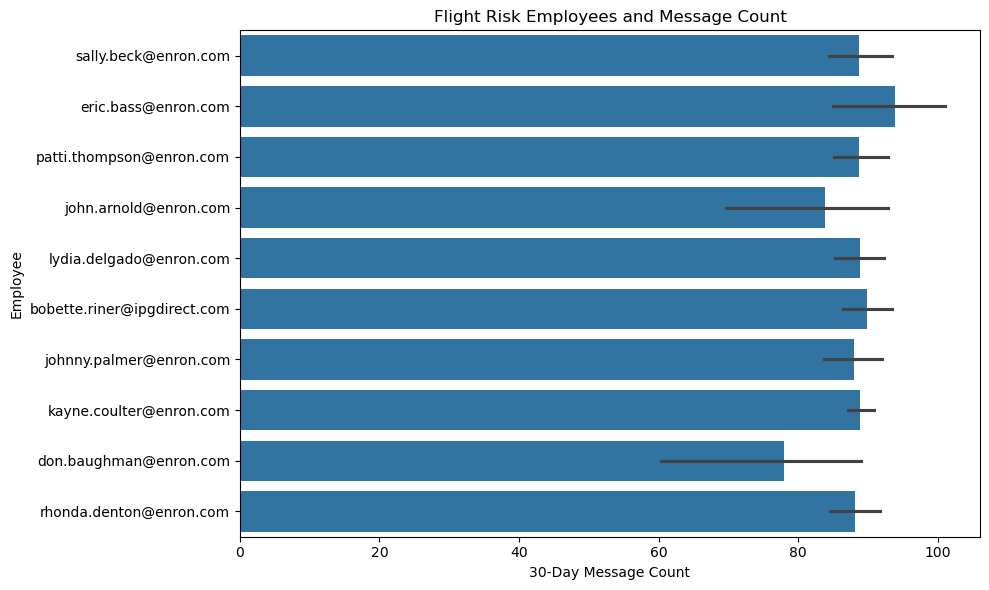

In [29]:
# Extract list
# Convert list to DataFrame
flightrisk_df = pd.DataFrame(flightrisk)

# Export Visualization
flightrisk_df.sort_values(by='RollingCount', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='RollingCount', y='Employee', data=flightrisk_df)
plt.title('Flight Risk Employees and Message Count')
plt.xlabel('30-Day Message Count')
plt.ylabel('Employee')
plt.tight_layout()
plt.show()

### Observation

The employees at risk are Don Baughman, John Arnold, Kayne Coulter, Sally Beck, Bobette Riner, Johnny Palmer, Lydia Delgado, Patti Thompson, Eric Bass, and Ronda Denton.

## Task 6: Predictive Modeling

In [123]:
!pip install pandas numpy seaborn matplotlib scikit-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Install and import necessary modules

In [127]:
# Import sentiment dataframe
df = pd.read_csv('./datawithSentiment.csv')

##Check imported df 
print(df.head(5))

                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body        date  \
0  EnronOptions Announcement\n\n\nWe have updated...  2010-05-10   
1  Marc,\n\nUnfortunately, today is not going to ...  2010-07-29   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  2011-07-25   
3  we were thinking papasitos (we can meet somewh...  2010-03-25   
4  Since you never gave me the $20 for the last t...  2011-05-21   

                      from Sentiment  
0     sally.beck@enron.com  Positive  
1      eric.bass@enron.com   Neutral  
2     sally.beck@enron.com   Neutral  
3  johnny.palmer@enron.com   Neutral  
4  lydia.delgado@enron.com   Neutral  


In [129]:
# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])  

In [131]:
# Assign Sentiment to numerical values for analysis
sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['Sentiment_Score'] = df['Sentiment'].map(sentiment_map)

In [133]:
#Extract month and year from date for Month-Year feature
df['Month_Year'] = df['date'].dt.to_period('M')

# Sort dates
df = df.sort_values(['date'])

In [135]:
# Create some features for model. Can add more features later
df['Message_Frequency'] = df.groupby(df['from'])['date'].transform('count') 
df['Day_of_Week'] = df['date'].dt.dayofweek
df['Prev_Sentiment_SameSender'] = df.groupby('from')['Sentiment_Score'].shift(1).fillna(0)
df['Prev_Sentiment_2_SameSender'] = df.groupby('from')['Sentiment_Score'].shift(2).fillna(0)
df['Prev_Sentiment_3_SameSender'] = df.groupby('from')['Sentiment_Score'].shift(3).fillna(0)
df['Message_Frequency_MonthYear'] = df.groupby(df['from'])['Month_Year'].transform('count') 
df['Time_Since_Last_Message'] = df.groupby('from')['date'].diff().dt.days.fillna(0) 
df['Msg_Count_Rolling30'] = (df.groupby('from')['Sentiment_Score'].transform(lambda x: x.rolling(window=30, min_periods=1).count()))

df['Message_Length'] = df['body'].str.len()
df['Word_Count'] = df['body'].str.split().str.len()
df['Cumulative_Sentiment_Avg'] = (df.groupby('from')['Sentiment_Score'].expanding().mean().reset_index(level=0, drop=True))

In [137]:
# X are features and Y is the target variable. In X is an example feature that had one of the higher predictive values.
X = df[['Cumulative_Sentiment_Avg']]
y = df['Sentiment_Score']

In [139]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [143]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [145]:
# Validate the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Print coefficients of the model for analysis
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 0.30893435116128803
R-squared: 0.024732389428735013
                          Coefficient
Cumulative_Sentiment_Avg     1.138899


### Observation
The standard of an ideal predictive model is when the mean square error is MSE < 0.22 with positive R-squared the is R > 0.2.

Message_frequency had little predictive value with a high MSE and negative R-squared along with a positive coefficient with Sentiment.
Day_of_week had little predictive value with a high MSE and negative R-squared along with a positive coefficient with Sentiment.
Msg_Count_Rolling30 had little predictive value with a high MSE and negative R-squared along with a positive coefficient
Time_Since_Last_Message had little predictive value with a high MSE and negative R-squared along with a negative coefficient with Sentiment.

Prev_Sentiment_SameSender had little predictive value with a high MSE and negative R-squared along with a negative coefficient with Sentiment. I created Prev_Sentiment_2_SameSenderSame and Prev_Sentiment_3_SameSender to see if the sentiments from two messages back and three messages back, respectively, would effect future sentiment. However, there was the same issue with high MSE and a negative R-squared when I ran 2 and 3 separately and ran all three together.

I created Message_Frequency_MonthYear to see if it had a better predictive value than Message_Frequency for specific days. I ideally wanted the Month_Year to return more frequencies per employee. However, the results were the same as Message_Frequency. 


Message_Length had a much better predictive value with a MSE of .31 and positive R-squared of 0.065 along with a positive coefficient 0.0005 with Sentiment.
Word_Count had a much better predictive value with a MSE of .31 and positive R-squared of 0.075 along with a positive coefficient 0.003 with Sentiment
Cumulative_Sentiment_Avg had a much better predictive value with a MSE of .31 and positive R-squared of 0.024 along with a positive coefficient 1.138899 with Sentiment.

### Comments
Word_Count had the highest predictability with the lowest MSE and highest R-Squared value. There was also a positive coefficient. Therefore, as the word count increases, the more likely the message is to be positive.
Message_Length had the second highest predictability. There was also a positive coefficient. Therefore, as the message length increases, the more likely the message is to be positive.
The Cumulative_Sentiment_Avg had the third highest predictability. This feature also had the strongest positive coefficient. Therefore, the higher average sentiment is likely to predict more positive future sentiments.